In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [3]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [4]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [5]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -11.174194310142326
method1 -11.16419431014215
method2 -11.174194310142127


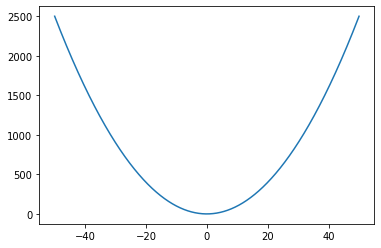

In [6]:
plt.plot(x, func1(x))
plt.show()

In [7]:
x0=np.random.uniform(-50, 50)
alpha=0.15
n_iter=50
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

29.095934631993686 846.5734121092495
20.36715424239558 414.82097193353223
14.257007969676906 203.2622762474308
9.979905578773835 99.59851536124111
6.985933905141684 48.80327252700815
4.890153733599179 23.913603538233993
3.4231076135194254 11.717665733734655
2.396175329463598 5.7416562095299835
1.6773227306245189 2.813411542669692
1.1741259114371632 1.3785716559081491
0.8218881380060142 0.6755001113949931
0.57532169660421 0.3309950545835466
0.40272518762294696 0.16218757674593784
0.2819076313360629 0.07947191260550955
0.19733534193524405 0.038941237176699686
0.13813473935467083 0.019081206216582845
0.09669431754826957 0.009349791046125593
0.0676860222837887 0.004581397612601541
0.04738021559865209 0.002244884830174755
0.03316615091905646 0.0010999935667856298
0.023216305643339524 0.0005389968477249586
0.016251413950337665 0.0002641084553852297
0.011375989765236367 0.00012941314313876258
0.007963192835665458 6.341244013799367e-05
0.005574234984965821 3.1072095667616905e-05
0.003901964489

In [80]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
#         print(x0)
        for i in range(self.n_iter):
#             print(self.alpha*grad(x0), x0)
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

3.5314126600594736e-09 1.2470875375628328e-17


<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

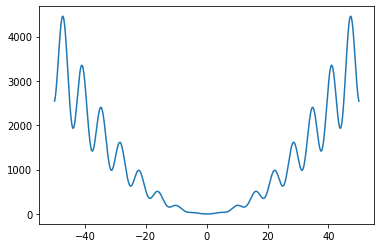

In [9]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

In [91]:
alpha = 0.1
opt1=optimizer(alpha, 100)
def grad2(_x): return 2*_x*(np.sin(0.5*_x)**2 + 1) + x**2*np.sin(x*0.5)*np.cos(x*0.5)
# x = 

# print(calculate_grad(func2, x))
# print(grad2(x))

x=opt1.fit(func2, grad2, np.random.uniform(-50, 50))
print(x, func2(x))

3.629478867909966e+111 2.1218533990586818e+223


## Линейная регрессия

In [11]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [12]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [13]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.2634267979430492, 3.174641048703116)

In [14]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [15]:
mserror_grad(X, w_true, Y)

array([[-0.02236829,  0.04354825]])

In [16]:
mserror_grad(X, w, Y)

array([[12.94566754,  4.00290392]])

In [17]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

curent error: 0.6615051942213722
curent error: 0.31837923409726987
curent error: 0.2710489109902604
curent error: 0.2644639561757413
curent error: 0.2635413079445845
curent error: 0.26341128729262014
curent error: 0.2633928800226989
curent error: 0.26339026450589065
curent error: 0.2633898917868733
curent error: 0.2633898385526251
curent error: 0.2633898309358608
curent error: 0.26338982984454845
curent error: 0.26338982968802027
curent error: 0.2633898296655506
curent error: 0.263389829662323
curent error: 0.26338982966185914
curent error: 0.2633898296617924
curent error: 0.26338982966178287
curent error: 0.2633898296617814


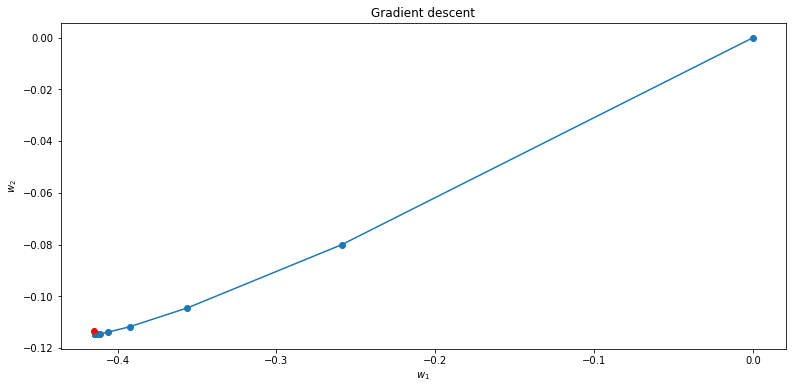

In [18]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

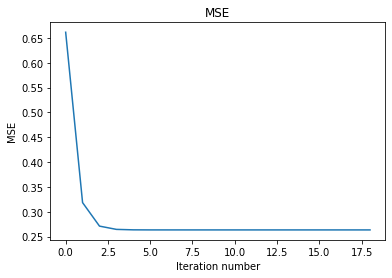

In [19]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

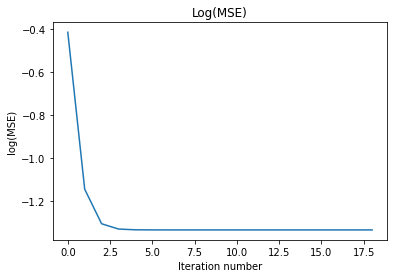

In [20]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [21]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет {0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет 0.2634


In [22]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [23]:
shift=np.random.uniform(0, 100)
Y_shift=Y+shift
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

0.2633736340117906

In [24]:
shift, lr.w0

(61.158212817027135, 61.16224303691233)

In [25]:
lr.w, w_true

(array([[-0.41427525, -0.11461005]]), array([[-0.41504986, -0.11333755]]))